## Loading the dataset

In [2]:
# import pandas as pd
# from sklearn.model_selection import train_test_split

# spambase_augmented = pd.read_csv('spambase_augmented.csv')

# features = spambase_augmented.drop(spambase_augmented.columns[-1], axis=1)
# target = spambase_augmented[spambase_augmented.columns[-1]]

# X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


## Training the random forest

In [2]:
# from sklearn.ensemble import RandomForestClassifier
# import pandas as pd
# from sklearn.metrics import accuracy_score


# #Can change max samples as a param
# rf = RandomForestClassifier(n_estimators=100, random_state=42, bootstrap=True, max_features='sqrt')

# rf.fit(X_train, y_train)

# y_pred = rf.predict(X_test)

# accuracy = accuracy_score(y_test, y_pred)

# print(accuracy)

# Training/Test Error vs Training Set Size

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.metrics import accuracy_score

##Variables to change
test_size = 0.2
criterion = 'gini'
n_estimators = 100

spambase_augmented = pd.read_csv('spambase_augmented.csv')

features = spambase_augmented.drop(spambase_augmented.columns[-1], axis=1)
target = spambase_augmented[spambase_augmented.columns[-1]]

training_splits = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

training_errors = []
testing_errors = []

for train_split in training_splits:

    print("Working on train split: ", train_split)

    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=test_size, train_size=train_split, random_state=42)

    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42, bootstrap=True, max_features='sqrt', criterion=criterion)

    rf.fit(X_train, y_train)

    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)

    training_accuracy = accuracy_score(y_train, y_train_pred)
    testing_accuracy = accuracy_score(y_test, y_test_pred)

    training_errors.append(1 - training_accuracy)
    testing_errors.append(1 - testing_accuracy)


Working on train split:  0.1
Working on train split:  0.2
Working on train split:  0.3
Working on train split:  0.4
Working on train split:  0.5
Working on train split:  0.6
Working on train split:  0.7
Working on train split:  0.8


In [3]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter


def plot_accuracies_with_varying_splits(training_errors, testing_errors, title):
    plt.figure(figsize=(10, 6))
    plt.plot(training_splits, training_errors, label='Training Error',  linestyle='-', color='orange', marker='o', markersize=5)
    plt.plot(training_splits, testing_errors, label='Test Error', linestyle='-', color='blue', marker='o', markersize=5)

    plt.title(title)
    plt.xlabel('Training Split (%)')
    plt.ylabel('Error')
    plt.legend()

    plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1))


    plt.grid(True)
    plt.show()

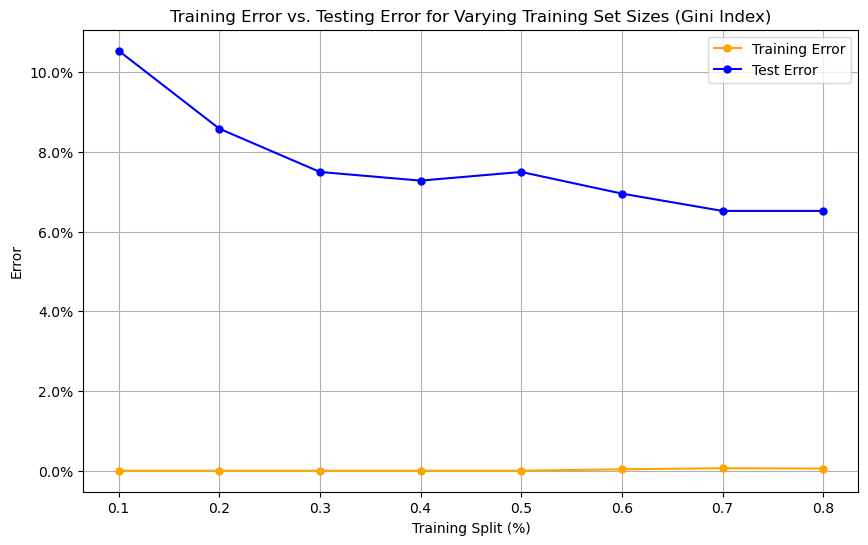

In [4]:
plot_accuracies_with_varying_splits(training_errors, testing_errors, 'Training Error vs. Testing Error for Varying Training Set Sizes (Gini Index)')

# Training/Test Error vs Number of Trees

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.metrics import accuracy_score

##Variables to change
test_size = 0.2
criterion = 'gini'

spambase_augmented = pd.read_csv('spambase_augmented.csv')

spambase_augmented = spambase_augmented.sample(frac=1, random_state=42).reset_index(drop=True)


features = spambase_augmented.drop(spambase_augmented.columns[-1], axis=1)
target = spambase_augmented[spambase_augmented.columns[-1]]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=test_size, random_state=42)


number_of_trees = [2, 5, 10, 15, 20, 50, 100, 200]

training_errors = []
testing_errors = []

for number in number_of_trees:

    print("Working on number of trees: ", number)

    rf = RandomForestClassifier(n_estimators=number, random_state=42, bootstrap=True, max_features='sqrt', criterion=criterion)

    rf.fit(X_train, y_train)

    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)

    training_accuracy = accuracy_score(y_train, y_train_pred)
    testing_accuracy = accuracy_score(y_test, y_test_pred)

    training_errors.append(1 - training_accuracy)
    testing_errors.append(1 - testing_accuracy)


print(training_errors)
print(testing_errors)

Working on number of trees:  2
Working on number of trees:  5
Working on number of trees:  10
Working on number of trees:  15
Working on number of trees:  20
Working on number of trees:  50
Working on number of trees:  100
Working on number of trees:  200
[0.03858695652173916, 0.0038043478260869623, 0.003532608695652195, 0.001630434782608714, 0.001630434782608714, 0.00027173913043476716, 0.00027173913043476716, 0.00027173913043476716]
[0.10434782608695647, 0.05760869565217386, 0.06413043478260871, 0.05978260869565222, 0.05434782608695654, 0.05217391304347829, 0.05108695652173911, 0.05217391304347829]


In [7]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter


def plot_accuracies_with_varying_number_of_trees(training_accuracies, testing_accuracies, title):
    plt.figure(figsize=(10, 6))
    plt.plot(number_of_trees, training_accuracies, label='Training Error',  linestyle='-', color='orange', marker='o', markersize=5)
    plt.plot(number_of_trees, testing_accuracies, label='Test Error', linestyle='-', color='blue', marker='o', markersize=5)

    plt.title(title)
    plt.xlabel('Number of Trees')
    plt.ylabel('Error')
    plt.legend()

    plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1))


    plt.grid(True)
    plt.show()

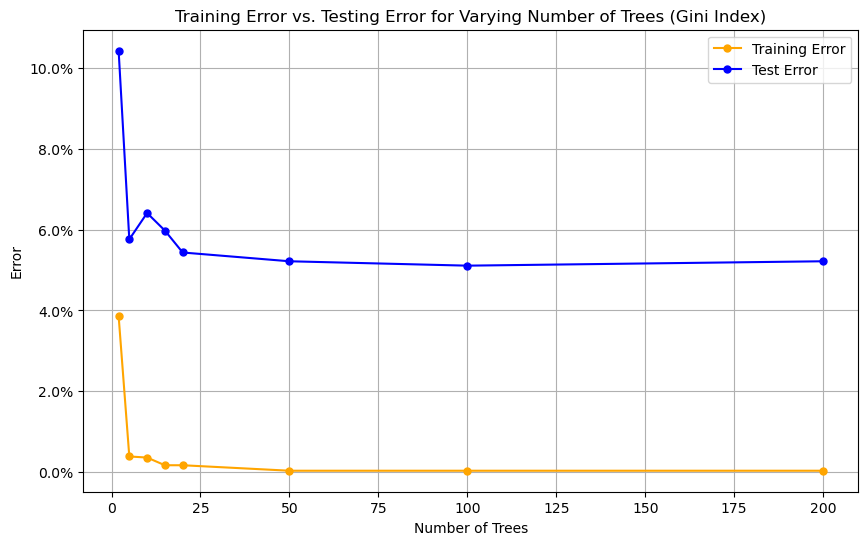

In [8]:
plot_accuracies_with_varying_number_of_trees(training_errors, testing_errors, 'Training Error vs. Testing Error for Varying Number of Trees (Gini Index)')

# Training/Test Error vs Number of random features (d’)

In [9]:
from math import sqrt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.metrics import accuracy_score

##Variables to change
test_size = 0.2
num_estimators = 100
criterion = 'gini'

spambase_augmented = pd.read_csv('spambase_augmented.csv')

features = spambase_augmented.drop(spambase_augmented.columns[-1], axis=1)
target = spambase_augmented[spambase_augmented.columns[-1]]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=test_size, random_state=42)


d = len(features.columns)

d_prime_values = [int(sqrt(d)), int(d/4), int(d/3)]

training_errors = []
testing_errors = []

for d_prime in d_prime_values:

    print("Working on d_prime ", d_prime)

    rf = RandomForestClassifier(n_estimators=num_estimators, random_state=42, bootstrap=True, max_features=d_prime, criterion=criterion)

    rf.fit(X_train, y_train)

    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)

    training_accuracy = accuracy_score(y_train, y_train_pred)
    testing_accuracy = accuracy_score(y_test, y_test_pred)

    training_errors.append(1 - training_accuracy)
    testing_errors.append(1 - testing_accuracy)

Working on d_prime  34
Working on d_prime  296
Working on d_prime  395


In [11]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter


def plot_accuracies_with_varying_number_of_trees(training_accuracies, testing_accuracies, title):
    plt.figure(figsize=(10, 6))
    plt.plot(d_prime_values, training_errors, label='Training Error',  linestyle='-', color='orange', marker='o', markersize=5)
    plt.plot(d_prime_values, testing_errors, label='Test Error', linestyle='-', color='blue', marker='o', markersize=5)

    plt.title(title)
    plt.xlabel('Number of Random Features (d′)')
    plt.ylabel('Error')
    plt.legend()

    plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1))


    plt.grid(True)
    plt.show()

In [12]:
plot_accuracies_with_varying_number_of_trees(training_errors,testing_errors, "Training Error vs. Testing Error for Varying Number of Random Features (d′) (Gini Index)")



In [33]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

spambase_augmented = pd.read_csv('spambase_augmented.csv')

#Shuffle the data
spambase_augmented = spambase_augmented.sample(frac=1, random_state=42).reset_index(drop=True)

training_data, testing_data = train_test_split(spambase_augmented, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=175, random_state=42, bootstrap=True, max_features='sqrt')
rf.fit(training_data.drop(training_data.columns[-1], axis=1), training_data[training_data.columns[-1]])

predictions = rf.predict(testing_data.drop(testing_data.columns[-1], axis=1))
accuracy = accuracy_score(testing_data[testing_data.columns[-1]], predictions)


error = 1 - accuracy

print(error)


0.05108695652173911
